In [37]:
# our commonly used functions
from global_bug_bot_functions import  *


# libraries for building convolutional neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model

# libraries for tuning models
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from keras_tuner import HyperParameters
from tensorflow.keras import backend as K
from keras.callbacks import History, EarlyStopping
from tensorflow.keras.regularizers import l2


# utility libraries
import os
import time
import itertools
import random
import numpy as np



# Set random seeds for reproducibility
seed_value = 2025
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# data set constants
TRAIN_GENERATOR = load_data(TRAIN_DIR)
VAL_GENERATOR = load_data(VALID_DIR)
TEST_GENERATOR = load_data(TEST_DIR, shuffle_flag=False)
EVAL_VAL_GENERATOR = load_data(VALID_DIR, shuffle_flag=False)

# best hps found from tuning
# from ep20_pat3_del0.001_ex1_maxtr20_from_tuning_script_final_tuned_models_results_MobileNetV2.csv
# ---> tuned with max epoch = 20, patience = 3, minimum delta = 0.001, max trials = 20
best_lr = 0.001
best_dropout = 0.2
best_batch_size	= 64
best_epochs	= 15


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# freeze the base model layers
base_model.trainable = False

# global pooling and dropout layers included similar to jute pest architecture
x = BatchNormalization()(base_model.output) # JUST ADDED
x = Dropout(best_dropout)(x) # JUST ADDED
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dropout(best_dropout)(x)
x = BatchNormalization()(x) # JUST ADDED

# final softmax probabilistic classification layer - JUST ADDED L2
output_layer = Dense(TRAIN_GENERATOR.num_classes, activation='softmax', kernel_regularizer=l2(0.05))(x)
model = Model(inputs=base_model.input, outputs=output_layer)

optimizer = Adam(learning_rate=best_lr)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(TRAIN_GENERATOR,validation_data=VAL_GENERATOR, epochs = best_epochs, batch_size = best_batch_size)



Found 6090 images belonging to 11 classes.
Found 440 images belonging to 11 classes.
Found 220 images belonging to 11 classes.
Found 440 images belonging to 11 classes.
Epoch 1/15


/Users/keeganveazey/Desktop/ds_capstone/BugBot/bugbot_env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


191/191 ━━━━━━━━━━━━━━━━━━━━ 34s 170ms/step - accuracy: 0.4737 - loss: 2.5967 - val_accuracy: 0.6614 - val_loss: 1.5943
Epoch 2/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 31s 163ms/step - accuracy: 0.8071 - loss: 1.1088 - val_accuracy: 0.6841 - val_loss: 1.3393
Epoch 3/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 32s 169ms/step - accuracy: 0.8546 - loss: 0.8509 - val_accuracy: 0.7000 - val_loss: 1.2424
Epoch 4/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 32s 170ms/step - accuracy: 0.8687 - loss: 0.7838 - val_accuracy: 0.6795 - val_loss: 1.2392
Epoch 5/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 35s 182ms/step - accuracy: 0.8735 - loss: 0.7579 - val_accuracy: 0.6818 - val_loss: 1.2399
Epoch 6/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 47s 244ms/step - accuracy: 0.8861 - loss: 0.7325 - val_accuracy: 0.6614 - val_loss: 1.2587
Epoch 7/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 47s 247ms/step - accuracy: 0.8749 - loss: 0.7397 - val_accuracy: 0.6659 - val_loss: 1.2483
Epoch 8/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 47s 247ms/step - accuracy: 0.8731 - loss: 0.7490 - val

# Validation plots

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 177ms/step
Classification Report:


,precision,recall,f1-score,support
adult_rice_weevil,0.711111,0.800000,0.752941,40.000000
american_house_spider,0.666667,0.600000,0.631579,40.000000
bedbug,0.617021,0.725000,0.666667,40.000000
brown_stink_bug,0.789474,0.750000,0.769231,40.000000
carpenter_ant,0.612245,0.750000,0.674157,40.000000
cellar_spider,0.823529,0.700000,0.756757,40.000000
flea,0.448980,0.550000,0.494382,40.000000
house_centipede,0.810811,0.750000,0.779221,40.000000
silverfish,0.750000,0.675000,0.710526,40.000000
subterranean_termite,0.656250,0.525000,0.583333,40.000000


<Figure size 800x600 with 0 Axes>

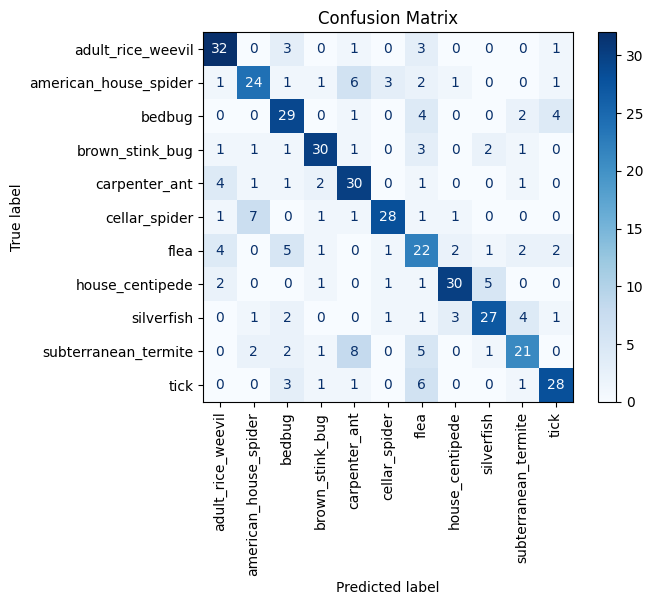

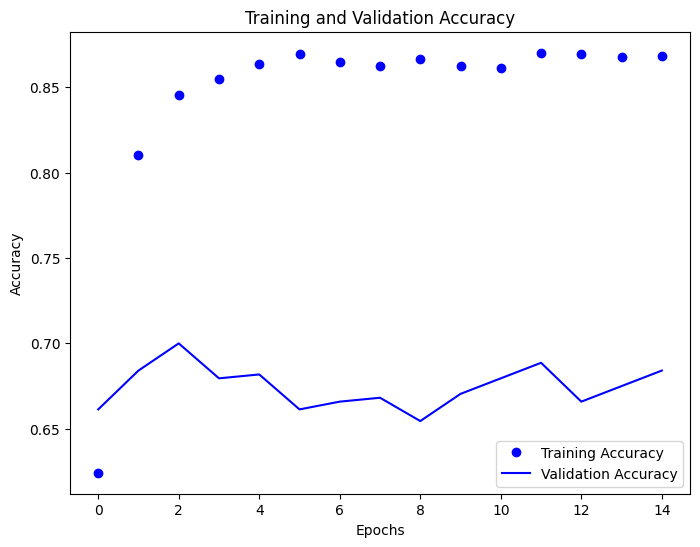

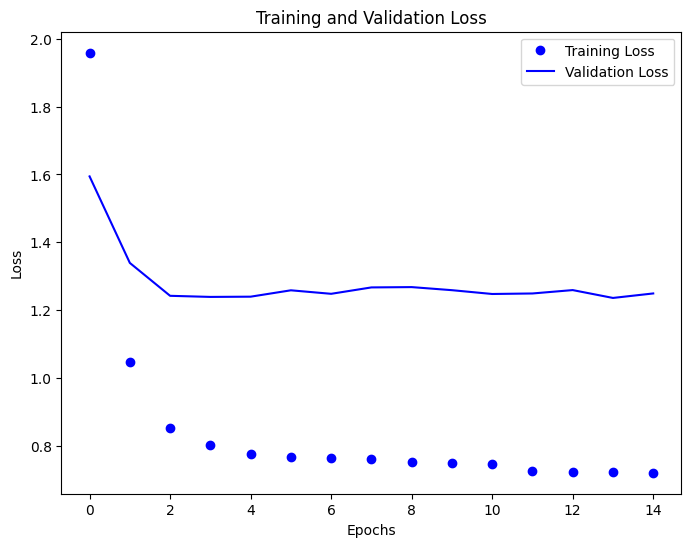

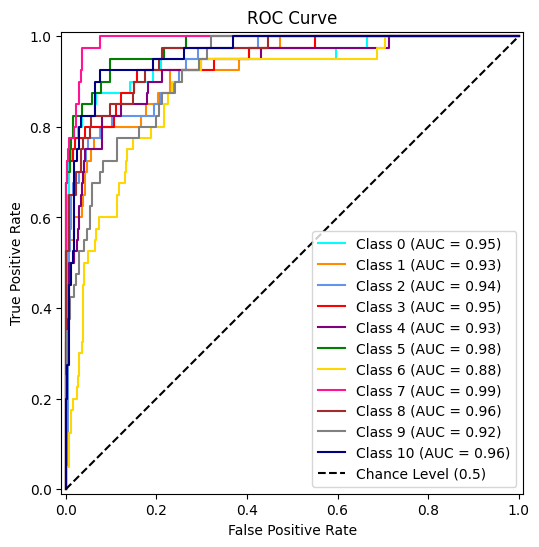

Macro-averaged One-vs-One ROC AUC score: 0.95
Accuracy: 0.684
Precision: 0.695
Recall: 0.684
F1 Score: 0.686


{'accuracy': 0.684,
 'precision': 0.695,
 'recall': 0.684,
 'f1_score': 0.686,
 'classification_report_df':                        precision    recall  f1-score     support
 adult_rice_weevil       0.711111  0.800000  0.752941   40.000000
 american_house_spider   0.666667  0.600000  0.631579   40.000000
 bedbug                  0.617021  0.725000  0.666667   40.000000
 brown_stink_bug         0.789474  0.750000  0.769231   40.000000
 carpenter_ant           0.612245  0.750000  0.674157   40.000000
 cellar_spider           0.823529  0.700000  0.756757   40.000000
 flea                    0.448980  0.550000  0.494382   40.000000
 house_centipede         0.810811  0.750000  0.779221   40.000000
 silverfish              0.750000  0.675000  0.710526   40.000000
 subterranean_termite    0.656250  0.525000  0.583333   40.000000
 tick                    0.756757  0.700000  0.727273   40.000000
 accuracy                0.684091  0.684091  0.684091    0.684091
 macro avg               0.694804  

In [38]:
%matplotlib inline
evaluation_metrics(model, EVAL_VAL_GENERATOR, history)


# Validation metrics: 'accuracy': 0.675,'precision': 0.693,'recall': 0.675,'f1_score': 0.679

# Test plots

/Users/keeganveazey/Desktop/ds_capstone/BugBot/bugbot_env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step
Classification Report:


,precision,recall,f1-score,support
adult_rice_weevil,0.750000,0.750000,0.750000,20.000000
american_house_spider,0.882353,0.750000,0.810811,20.000000
bedbug,0.500000,0.650000,0.565217,20.000000
brown_stink_bug,0.818182,0.900000,0.857143,20.000000
carpenter_ant,0.750000,0.750000,0.750000,20.000000
cellar_spider,0.850000,0.850000,0.850000,20.000000
flea,0.500000,0.550000,0.523810,20.000000
house_centipede,0.894737,0.850000,0.871795,20.000000
silverfish,0.933333,0.700000,0.800000,20.000000
subterranean_termite,0.687500,0.550000,0.611111,20.000000


<Figure size 800x600 with 0 Axes>

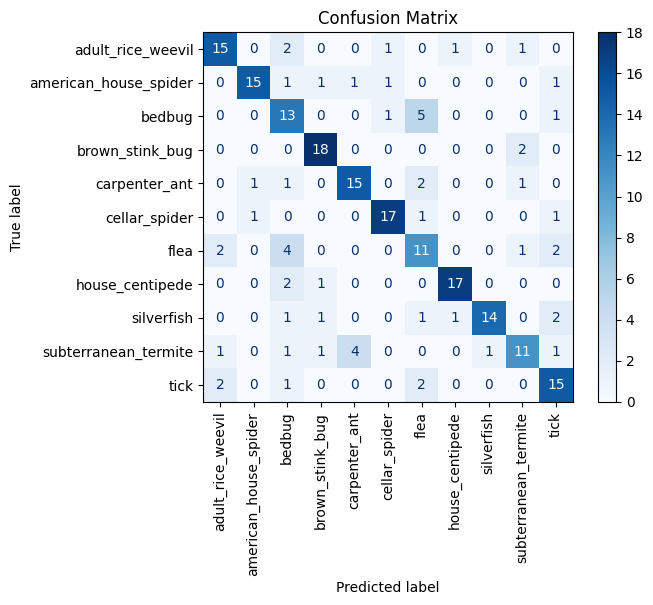

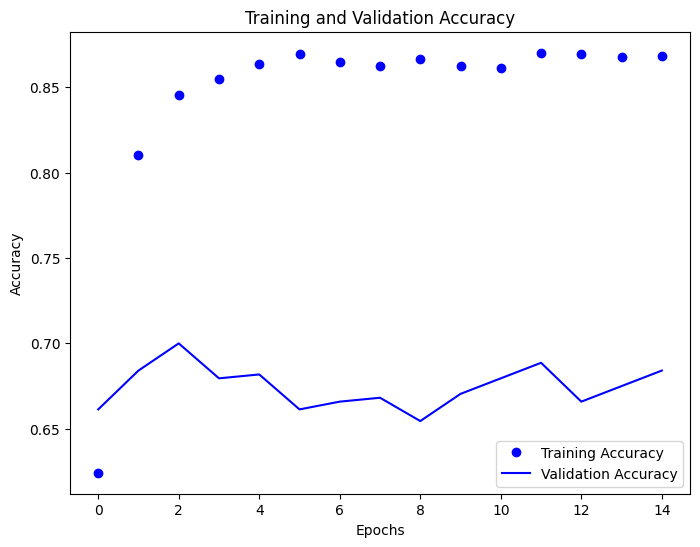

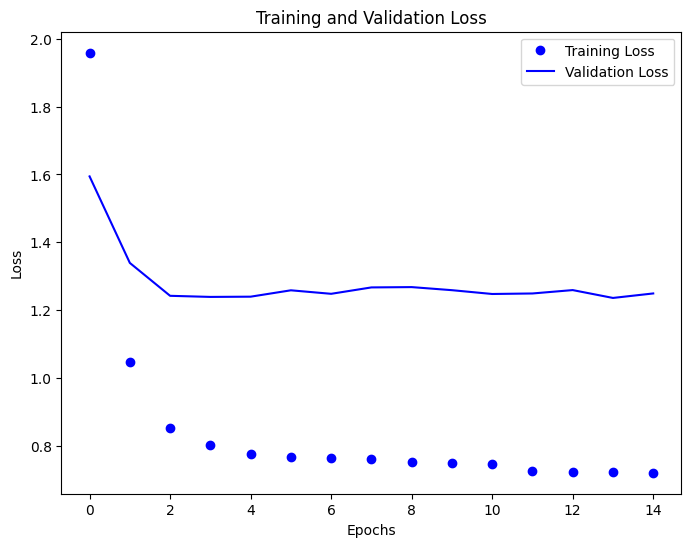

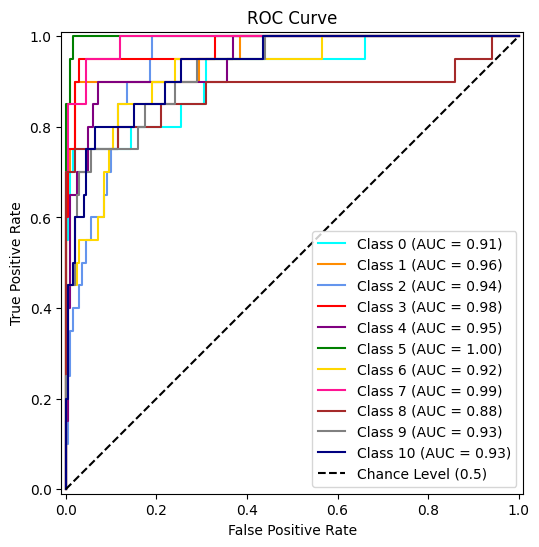

Macro-averaged One-vs-One ROC AUC score: 0.94
Accuracy: 0.732
Precision: 0.747
Recall: 0.732
F1 Score: 0.735


{'accuracy': 0.732,
 'precision': 0.747,
 'recall': 0.732,
 'f1_score': 0.735,
 'classification_report_df':                        precision    recall  f1-score     support
 adult_rice_weevil       0.750000  0.750000  0.750000   20.000000
 american_house_spider   0.882353  0.750000  0.810811   20.000000
 bedbug                  0.500000  0.650000  0.565217   20.000000
 brown_stink_bug         0.818182  0.900000  0.857143   20.000000
 carpenter_ant           0.750000  0.750000  0.750000   20.000000
 cellar_spider           0.850000  0.850000  0.850000   20.000000
 flea                    0.500000  0.550000  0.523810   20.000000
 house_centipede         0.894737  0.850000  0.871795   20.000000
 silverfish              0.933333  0.700000  0.800000   20.000000
 subterranean_termite    0.687500  0.550000  0.611111   20.000000
 tick                    0.652174  0.750000  0.697674   20.000000
 accuracy                0.731818  0.731818  0.731818    0.731818
 macro avg               0.747116  

In [39]:
%matplotlib inline
evaluation_metrics(model, TEST_GENERATOR, history)


# Test metrics: 'accuracy': 0.732, 'precision': 0.747,'recall': 0.732, 'f1_score': 0.735